In [1]:
print("Prashant Bankar.\nRoll No.:TACO22153")

Prashant Bankar.
Roll No.:TACO22153


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\hp\LP-2 PRACTICALS\Extended_Employee_Performance_and_Productivity_Data.csv")


In [8]:
print(df.head())
print(df.info())

   Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34               

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [10]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [12]:
df.drop(["Department", "Gender",
"Job_Title","Hire_Date","Resigned"],axis=1, inplace=True)


KeyError: "['Department', 'Gender', 'Job_Title', 'Hire_Date', 'Resigned'] not found in axis"

In [13]:
df

,Employee_ID,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,55,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,29,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,3,55,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,4,48,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,5,36,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,27,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28
99996,99997,36,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48
99997,99998,53,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60
99998,99999,22,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10


In [14]:
df["Education_Level"].unique()

array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object)

In [15]:
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df

,Employee_ID,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,55,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,29,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,3,55,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,4,48,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,5,36,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,27,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28
99996,99997,36,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48
99997,99998,53,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60
99998,99999,22,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10


In [16]:
df['High_Performer'] = (df['Performance_Score'] >= 4).astype(int)
df

,Employee_ID,Age,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,High_Performer
0,1,55,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,1
1,2,29,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,1
2,3,55,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,48,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,36,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,27,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28,1
99996,99997,36,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,99998,53,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,99999,22,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,1


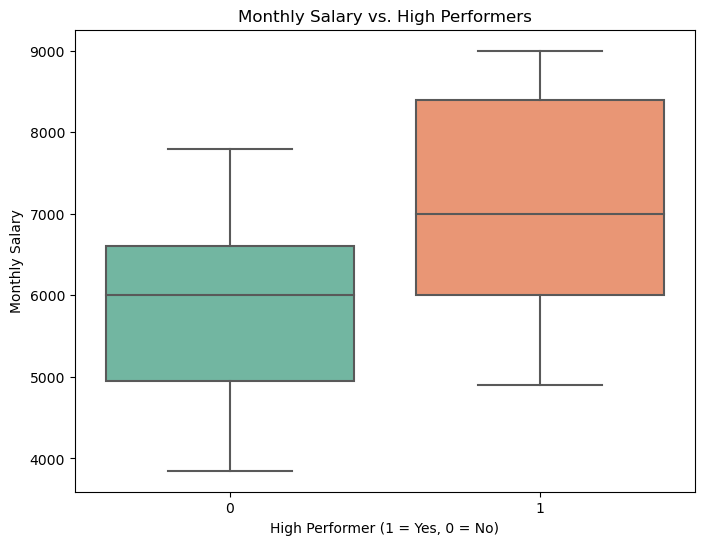

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_Performer', y='Monthly_Salary', data=df,
palette='Set2')
plt.title("Monthly Salary vs. High Performers")
plt.xlabel("High Performer (1 = Yes, 0 = No)")
plt.ylabel("Monthly Salary")
plt.show()

In [19]:
# Selecting features and label
X = df[['Performance_Score', 'Education_Level', 'Employee_Satisfaction_Score']]
Y = df['High_Performer']

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Displaying test features
print(X_test.head())  # or just X_test in Jupyter

       Performance_Score  Education_Level  Employee_Satisfaction_Score
75721                  2                2                         4.59
80184                  4                1                         4.83
19864                  3                1                         2.23
76699                  1                2                         4.88
92991                  4                0                         3.68


In [23]:
# Feature matrix
X = df[
    ['Performance_Score', 
     'Education_Level', 
     'Employee_Satisfaction_Score', 
     'Promotions']
]

# Target variable
Y = df['High_Performer']

# Train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# View the test set (optional)
print(X_test.head())

       Performance_Score  Education_Level  Employee_Satisfaction_Score  \
75721                  2                2                         4.59   
80184                  4                1                         4.83   
19864                  3                1                         2.23   
76699                  1                2                         4.88   
92991                  4                0                         3.68   

       Promotions  
75721           0  
80184           1  
19864           0  
76699           0  
92991           1  


In [24]:
 lr = LogisticRegression()
 lr.fit(X_train, Y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Confusion Matrix:
 [[12107     0]
 [    0  7893]]


In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  1.0


In [27]:
prediction = lr.predict([[5, 1, 1.72, 2]])
print(prediction)

[1]


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
prediction =lr.predict([[2, 0, 1.25, 1]])
print(prediction)

[0]


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
